Check market1501 dataset:

Reference: [link](http://zheng-lab.cecs.anu.edu.au/Project/project_reid.html)

What's included in the directories?
- `bounding_box_test`: 19732 images
- `bounding_box_train`: 12936 images
- `query`: 750 identities with maximum of 6 images per identity (total of 3368 images)

Naming Rules: (example `0001_c1s1_001051_00.jpg`)
- `c1` is the first camera (totally 6 cameras).
- `s1` is sequence 1 of camera 1.
- `001051` is the 1051th frame in the sequence.
- The last two digts, are the bbox number for DPM detector.


In [ ]:
%cd ..

/home/ubuntu/dev/reid


In [43]:
# builtin
from collections import defaultdict
import os.path as osp
import re

# third-party
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

# mm
import mmcv

In [4]:
train_path = "data/market1501/Market-1501-v15.09.15/bounding_box_train"
query_path = "data/market1501/Market-1501-v15.09.15/query"
gallery_path = "data/market1501/Market-1501-v15.09.15/bounding_box_test"

assert osp.exists(train_path)
assert osp.exists(query_path)
assert osp.exists(gallery_path)

In [5]:
def parse_market1501(image_paths):
    
    pattern = re.compile(r"([-\d]+)_c(\d)")
    
    persons = defaultdict(list)
    
    def _split(path):
        _pid, _camid = map(int, pattern.search(path).groups())
        return _pid, _camid
    
    for img_path in image_paths:
        pid, camid = _split(img_path)
        
        persons[pid].append(
            dict(
                camid=camid,
                path=img_path,
            )
        )
            
    return dict(persons)

In [6]:
train_data = parse_market1501(mmcv.scandir(train_path, ".jpg"))
gallery_data = parse_market1501(mmcv.scandir(gallery_path, ".jpg"))
query_data = parse_market1501(mmcv.scandir(query_path, ".jpg"))

In [14]:
# basic stats:
print('#ids for train, query, gallery')
print(len(train_data.keys()), len(query_data.keys()), len(gallery_data.keys()))
# check if we have the appropriate number of ids:
print('number of different identities (train, query)', len(set(train_data.keys()) - set(query_data.keys())))
print('number of different identities (train, gallery)', len(set(train_data.keys()) - set(gallery_data.keys())))
print('number of different identities (query, gallery)', len(set(gallery_data.keys()) - set(query_data.keys())))
print(set(gallery_data.keys()) - set(query_data.keys()))

#ids for train, query, gallery
751 750 752
number of different identities (train, query) 751
number of different identities (train, gallery) 751
number of different identities (query, gallery) 2
{0, -1}


In [21]:
# checks:
def count_total_imgs(data):
    tot = 0
    for pid, inst in data.items():
        tot += len(inst)
    return tot

In [20]:
assert count_total_imgs(train_data) == 12936
assert count_total_imgs(query_data) == 3368
assert count_total_imgs(gallery_data) == 19732

Dataset statistics:

In [40]:
def gen_pid_counts(data):
    pids = [str(i) for i in list(data.keys())]
    counts = []
    for pid in pids:
        td = data[int(pid)]
        counts.append(len(td))
    
    return pids, counts

                1
count  751.000000
mean    17.225033
std     10.773484
min      2.000000
25%      9.000000
50%     15.000000
75%     22.000000
max     72.000000


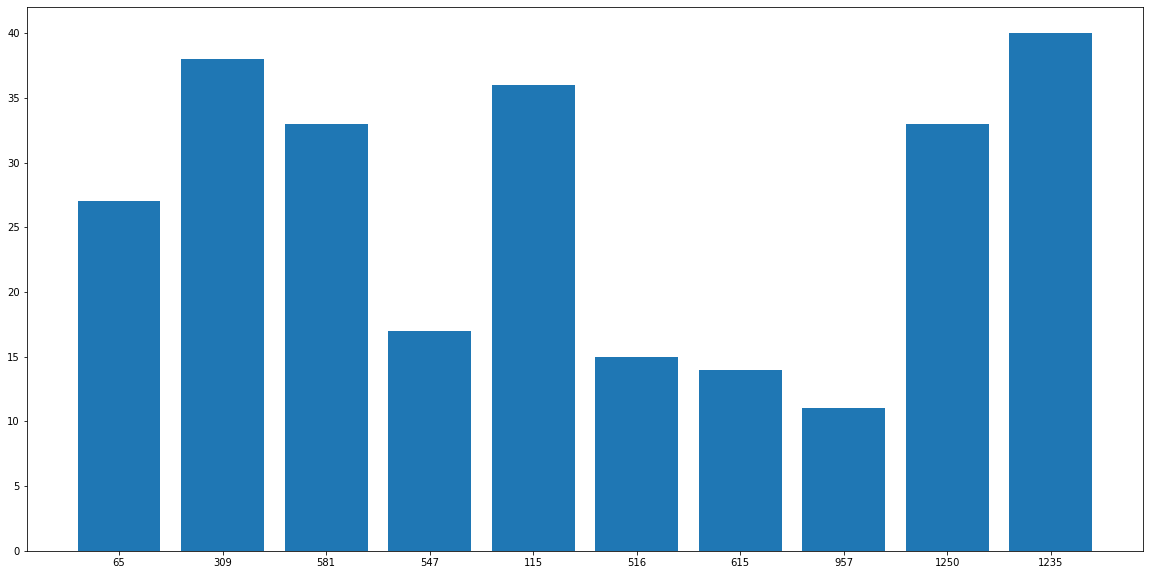

In [44]:
pids, counts = gen_pid_counts(train_data)

df = pd.DataFrame(list(zip(pids, counts)))
print(df.describe())

fig = plt.figure(figsize=(20, 10))
plt.bar(pids[:10], counts[:10])
plt.show()

                 1
count   752.000000
mean     26.239362
std     171.918140
min       2.000000
25%      10.750000
50%      16.000000
75%      22.000000
max    3819.000000


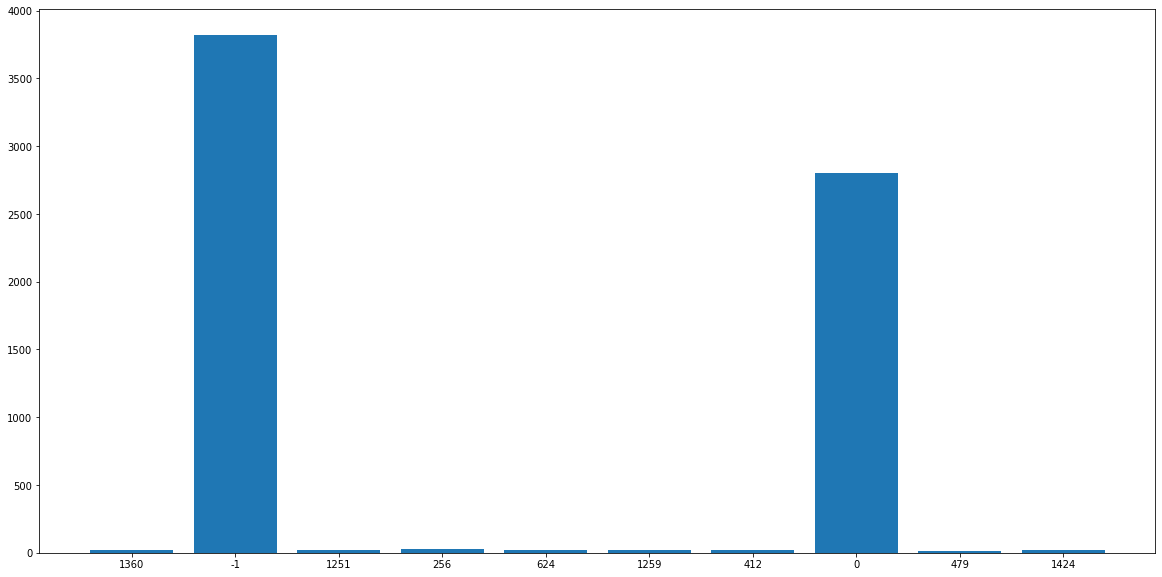

In [45]:
pids, counts = gen_pid_counts(gallery_data)

df = pd.DataFrame(list(zip(pids, counts)))
print(df.describe())

fig = plt.figure(figsize=(20, 10))
plt.bar(pids[:10], counts[:10])
plt.show()

                1
count  750.000000
mean     4.490667
std      0.984143
min      2.000000
25%      4.000000
50%      5.000000
75%      5.000000
max      6.000000


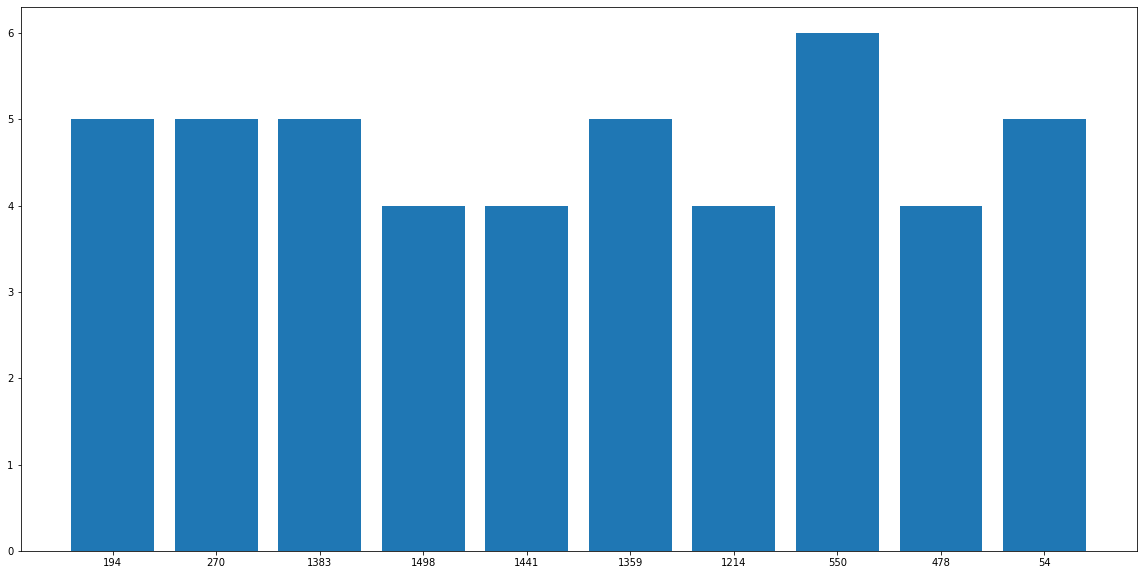

In [46]:
pids, counts = gen_pid_counts(query_data)

df = pd.DataFrame(list(zip(pids, counts)))
print(df.describe())

fig = plt.figure(figsize=(20, 10))
plt.bar(pids[:10], counts[:10])
plt.show()

In [48]:
extra_path = "data/market1501/Market-1501-v15.09.15/images"
extra_data = parse_market1501(mmcv.scandir(extra_path, ".jpg"))

In [54]:
print(len(extra_data.keys()))
print(extra_data.keys())  # 0 means background
print(len(extra_data[0]))  # should be 500k distractors

1
dict_keys([0])
500000


In [59]:
for i in np.random.randint(500000, size=40):
    print(extra_data[0][i])

{'camid': 2, 'path': '0000_c2s4_043576_44.jpg'}
{'camid': 2, 'path': '0000_c2s3_112072_40.jpg'}
{'camid': 2, 'path': '0000_c2s4_013776_03.jpg'}
{'camid': 2, 'path': '0000_c2s4_022976_01.jpg'}
{'camid': 1, 'path': '0000_c1s7_069756_21.jpg'}
{'camid': 2, 'path': '0000_c2s3_162372_62.jpg'}
{'camid': 2, 'path': '0000_c2s3_161397_29.jpg'}
{'camid': 1, 'path': '0000_c1s9_010611_38.jpg'}
{'camid': 2, 'path': '0000_c2s4_014351_45.jpg'}
{'camid': 1, 'path': '0000_c1s8_016106_16.jpg'}
{'camid': 2, 'path': '0000_c2s4_045276_46.jpg'}
{'camid': 3, 'path': '0000_c3s3_116344_36.jpg'}
{'camid': 2, 'path': '0000_c2s3_115997_13.jpg'}
{'camid': 2, 'path': '0000_c2s3_122072_22.jpg'}
{'camid': 2, 'path': '0000_c2s4_004101_35.jpg'}
{'camid': 2, 'path': '0000_c2s4_027776_50.jpg'}
{'camid': 2, 'path': '0000_c2s3_139022_63.jpg'}
{'camid': 1, 'path': '0000_c1s7_046376_17.jpg'}
{'camid': 1, 'path': '0000_c1s7_017976_24.jpg'}
{'camid': 2, 'path': '0000_c2s3_124422_05.jpg'}
{'camid': 2, 'path': '0000_c2s4_009551_7